# Polarization Simulations

Aaron Au - 2020

Simulate and visualize polarization that occur with PolFret module

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cmath
import math

## Determine outgoing polarization

Assuming that only linearly polarized light at angle (given above) is going through.

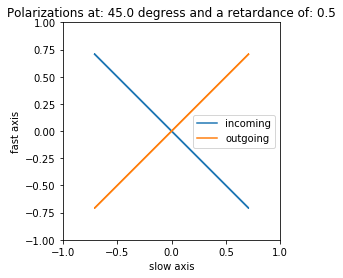

In [2]:
# Variables
angle =  45. #DEGREES relative to slow axis
retardance = 1./2.
period = np.linspace(-1,1,1000).astype(float)*math.pi

#Outgoing polarization
rad = angle*math.pi/180.

in_f = -1*np.exp(1j*period)*math.sin(rad)
in_s = np.exp(1j*period)*math.cos(rad)

out_f = in_f
out_s = in_s*np.exp(1j*-1*(retardance*2*math.pi))

plt.plot(np.real(in_s), np.real(in_f))
plt.plot(np.real(out_s), np.real(out_f))
plt.xlabel('slow axis')
plt.ylabel('fast axis')
plt.xlim((-1,1))
plt.ylim((-1,1))
ax = plt.gca()
ax.set_aspect(1)

plt.legend(['incoming', 'outgoing'])
plt.title('Polarizations at: ' + str(angle) + ' degress and a retardance of: ' + str(retardance) )

plt.show()

## Rotating Analyzer

Goal: Detect outgoing polarizations
What would be the intensities changes if a rotating polarization analyzer was added after outgoing path?

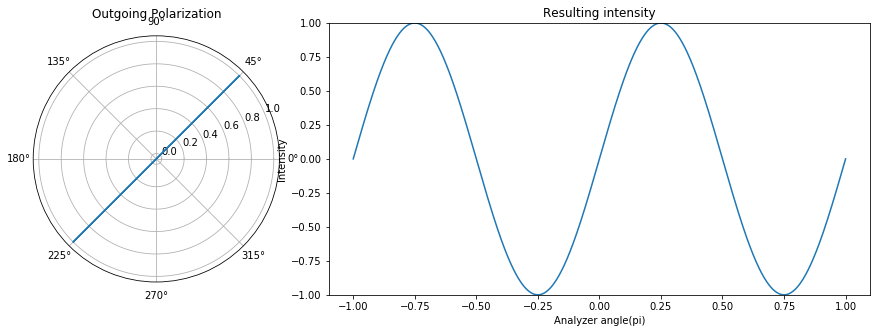

In [3]:
#convert to polar coordinates
r = np.sqrt(np.real(out_f)**2+np.real(out_s)**2)
ang = np.arctan2(np.real(out_s),np.real(out_f))

fig = plt.figure(figsize=(15, 5))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(spec[0, 0], projection='polar')
plt.polar(ang, r)
plt.title('Outgoing Polarization')

ax2 = fig.add_subplot(spec[0, 1:])

start_i = (np.abs(period-rad)).argmin()
i = 0

Ms = []
for t in range(len(period)):# For each angle from analyzer
    M = r*np.cos(2*(period[t]-ang))
    Ms.append(np.trapz(M, period)/4)

ax2.plot(period/math.pi, Ms) 
plt.ylim([-1,1.0])
plt.title('Resulting intensity')
plt.xlabel('Analyzer angle(pi)')
plt.ylabel('Intensity')
plt.show()


## Differently angled polarizations
What if the outgoing polarizations were linear but at different angles?

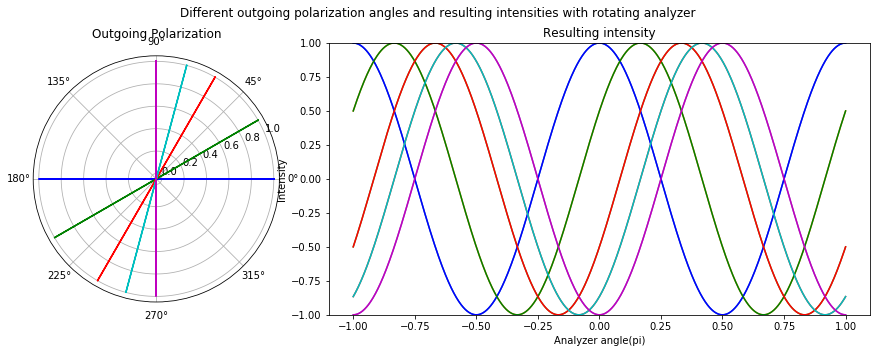

In [4]:
#Variables
retardance = 1./2.
angles = np.array([0,30,60,75,90])
colors = ['b','g','r','c','m','y','k']
Ms = np.zeros([len(period),len(angles)])

#figure prep
fig = plt.figure(figsize=(15, 5))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(spec[0, 0], projection='polar')
plt.title('Outgoing Polarization')

i=0
for a in angles:
    retardance = 1./2.
    rad = a*math.pi/180.

    out_f = -1*np.exp(1j*-1*period)*round(math.sin(rad),5)
    out_s = np.exp(1j*-1*(period+retardance*2*math.pi))*round(math.cos(rad),5)
    
    j=0
    r = np.sqrt(np.real(out_f)**2+np.real(out_s)**2)
    ang = np.arctan2(np.real(out_f),np.real(out_s))
    plt.polar(ang, r, colors[i])
    
    for t in range(len(period)):# For each angle from analyzer
        M = r*np.cos(2*(period[t]-ang))
        Ms[t,i] = np.trapz(M, period)/4

    i+= 1

ax2 = fig.add_subplot(spec[0, 1:]) 
ax2.plot(period/math.pi, Ms) 
plt.title('Resulting intensity')
plt.xlabel('Analyzer angle(pi)')
plt.ylabel('Intensity')
plt.ylim([-1,1.])
    
for i in range(len(angles)):
    ax2.plot(period/math.pi, Ms[:,i], colors[i])

fig.suptitle('Different outgoing polarization angles and resulting intensities with rotating analyzer');


## Circular polarization
What happens to the intensity when the outgoing light is circularly polarized?

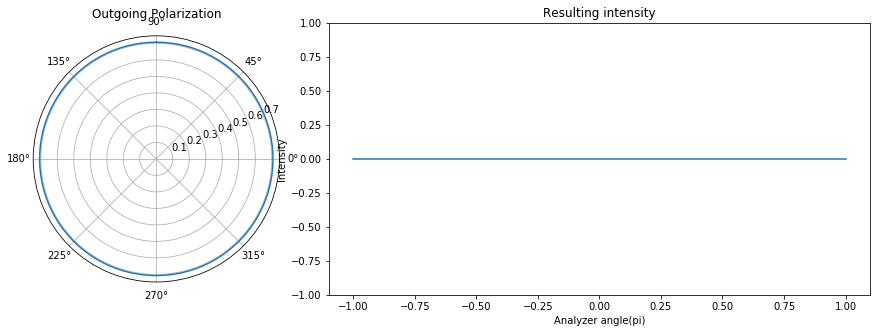

In [5]:
# Variables
angle =  45. #DEGREES relative to slow axis
retardance = 1./4.
period = np.linspace(-1,1,100)*math.pi

#Outgoing polarization
rad = angle*math.pi/180.

in_f = -1*np.exp(1j*period)*round(math.sin(rad),5)
in_s = np.exp(1j*period)*round(math.cos(rad),5)

out_f = -1*np.exp(1j*-1*period)*round(math.sin(rad),5)
out_s = np.exp(1j*-1*(period+retardance*2*math.pi))*round(math.cos(rad),5)
#convert to polar coordinates
r = np.sqrt(np.real(out_f)**2+np.real(out_s)**2)
ang = np.arctan2(np.real(out_f),np.real(out_s))
Ms = []

fig = plt.figure(figsize=(15, 5))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(spec[0, 0], projection='polar')
plt.polar(ang, r)
plt.title('Outgoing Polarization')

ax2 = fig.add_subplot(spec[0, 1:])

for t in range(len(period)):# For each angle from analyzer
    M = r*np.cos(2*(period[t]-ang))
    Ms.append(np.trapz(M, period)/4)

ax2.plot(period/math.pi, Ms) 
plt.ylim([-1,1.])
plt.title('Resulting intensity')
plt.xlabel('Analyzer angle(pi)')
plt.ylabel('Intensity')
plt.show()

## Ellipitical Polarization
What pattern will that make?

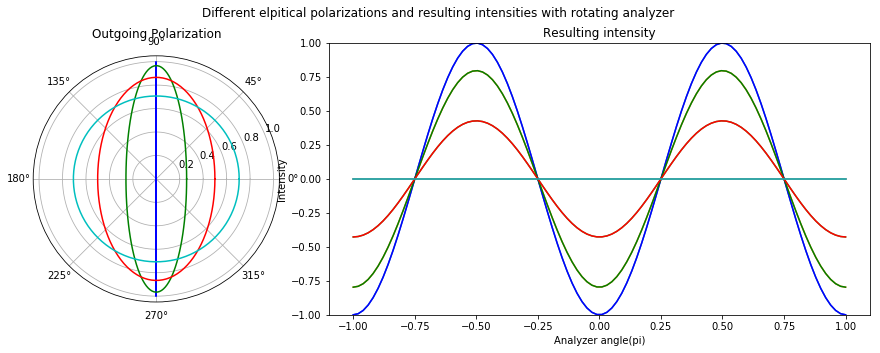

In [6]:
#Variables
retardance = 1./4.
angles = np.array([0,15,30,45])
colors = ['b','g','r','c','m','y','k']
Ms = np.zeros([len(period),len(angles)])

#figure prep
fig = plt.figure(figsize=(15, 5))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(spec[0, 0], projection='polar')
plt.title('Outgoing Polarization')

i=0
for a in angles:
    rad = a*math.pi/180.

    out_f = -1*np.exp(1j*-1*period)*round(math.sin(rad),5)
    out_s = np.exp(1j*-1*(period+retardance*2*math.pi))*round(math.cos(rad),5)
    
    j=0
    r = np.sqrt(np.real(out_f)**2+np.real(out_s)**2)
    ang = np.arctan2(np.real(out_s),np.real(out_f))
    plt.polar(ang, r, colors[i])
    
    for t in range(len(period)):# For each angle from analyzer
        M = r*np.cos(2*(period[t]-ang))
        Ms[t,i] = np.trapz(M, period)/4
    
    i += 1

ax2 = fig.add_subplot(spec[0, 1:]) 
ax2.plot(period/math.pi, Ms) 
plt.title('Resulting intensity')
plt.xlabel('Analyzer angle(pi)')
plt.ylabel('Intensity')
plt.ylim([-1,1])
    
for i in range(len(angles)):
    ax2.plot(period/math.pi, Ms[:,i], colors[i])

fig.suptitle('Different elpitical polarizations and resulting intensities with rotating analyzer');

## Angled Elliptical Polarization

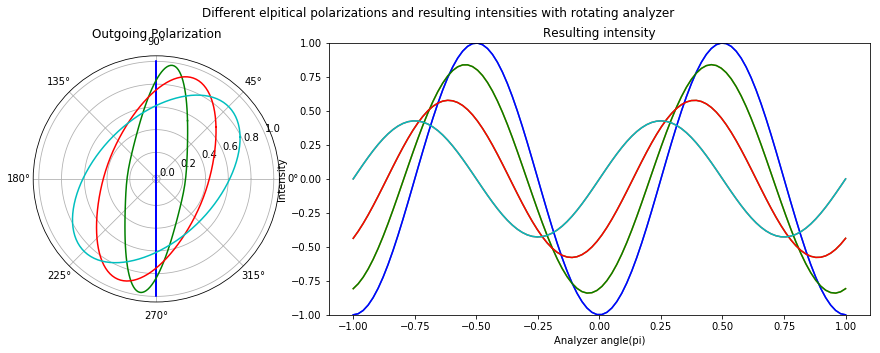

In [7]:
#Variables
retardance = 1./3.
angles = np.array([0,15,30,45])
colors = ['b','g','r','c','m','y','k']
Ms = np.zeros([len(period),len(angles)])

#figure prep
fig = plt.figure(figsize=(15, 5))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(spec[0, 0], projection='polar')
plt.title('Outgoing Polarization')

i=0
for a in angles:
    rad = a*math.pi/180.

    out_f = -1*np.exp(1j*-1*period)*round(math.sin(rad),5)
    out_s = np.exp(1j*-1*(period+retardance*2*math.pi))*round(math.cos(rad),5)
    
    j=0
    r = np.sqrt(np.real(out_f)**2+np.real(out_s)**2)
    ang = np.arctan2(np.real(out_s),np.real(out_f))
    plt.polar(ang, r, colors[i])
    
    for t in range(len(period)):# For each angle from analyzer
        M = r*np.cos(2*(period[t]-ang))
        Ms[t,i] = np.trapz(M, period)/4
        
    i += 1

ax2 = fig.add_subplot(spec[0, 1:]) 
ax2.plot(period/math.pi, Ms) 
plt.title('Resulting intensity')
plt.xlabel('Analyzer angle(pi)')
plt.ylabel('Intensity')
plt.ylim([-1,1])
    
for i in range(len(angles)):
    ax2.plot(period/math.pi, Ms[:,i], colors[i])

fig.suptitle('Different elpitical polarizations and resulting intensities with rotating analyzer');

## Experiment
Change of retardance from 0 - 1 wave @ 45 deg

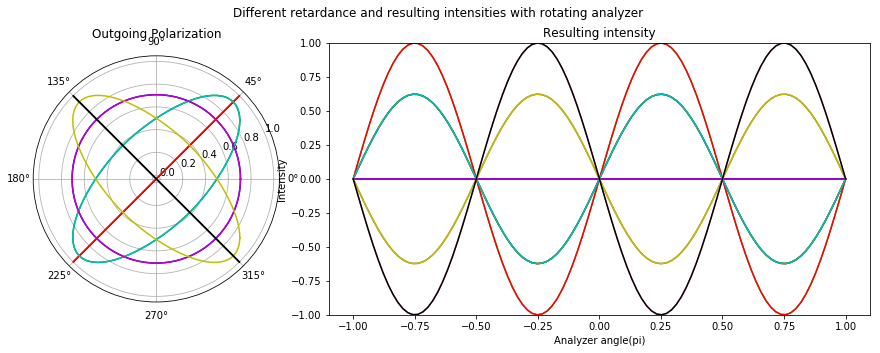

In [8]:
#Variables
retardances = [1/4,3/8,1/2,5/8,3/4,7/8,1.]
angle = 45
colors = ['b','g','r','c','m','y','k']
Ms = np.zeros([len(period),len(retardances)])

#figure prep
fig = plt.figure(figsize=(15, 5))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(spec[0, 0], projection='polar')
plt.title('Outgoing Polarization')

i=0
for retardance in retardances:
    rad = angle*math.pi/180.

    out_f = -1*np.exp(1j*-1*period)*round(math.sin(rad),5)
    out_s = np.exp(1j*-1*(period+retardance*2*math.pi))*round(math.cos(rad),5)
    
    j=0
    r = np.sqrt(np.real(out_f)**2+np.real(out_s)**2)
    ang = np.arctan2(np.real(out_s),np.real(out_f))
    plt.polar(ang, r, colors[i])
    
    for t in range(len(period)):# For each angle from analyzer
        M = r*np.cos(2*(period[t]-ang))
        Ms[t,i] = np.trapz(M, period)/4
        
    i += 1

ax2 = fig.add_subplot(spec[0, 1:]) 
ax2.plot(period/math.pi, Ms) 
plt.title('Resulting intensity')
plt.xlabel('Analyzer angle(pi)')
plt.ylabel('Intensity')
plt.ylim([-1,1])
    
for i in range(len(retardances)):
    ax2.plot(period/math.pi, Ms[:,i], colors[i])

fig.suptitle('Different retardance and resulting intensities with rotating analyzer');

## Side note: Original experiment
What happens if analyzer is stationary, and across various retardance 0 - 1
Note that in the LC retarder, retardance is a function of V, hence the curve is not the same.

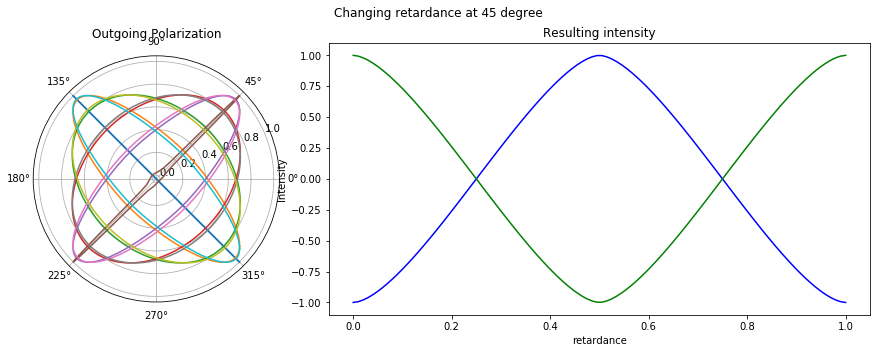

In [9]:
#Variables
retardances = np.linspace(0,1.,100)
angle = 45.
analyzers = [45.,135.]
colors = ['b','g','r','c','m','y','k']
Ms = np.zeros([len(analyzers),len(retardances)])

#figure prep
fig = plt.figure(figsize=(15, 5))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(spec[0, 0], projection='polar')
plt.title('Outgoing Polarization')

i=0
for retardance in retardances:
    rad = angle*math.pi/180.

    out_f = -1*np.exp(1j*-1*period)*math.sin(rad)
    out_s = np.exp(1j*-1*(period+retardance*2*math.pi))*math.cos(rad)
    
    j=0
    r = np.sqrt(np.real(out_f)**2+np.real(out_s)**2)
    ang = np.arctan2(np.real(out_s),np.real(out_f))
    
    if i%10 == 0:
        plt.polar(ang, r)
    
    for x in analyzers:
        analyzer = x*math.pi/180
        M = r*np.cos(2*(analyzer-ang))
        Ms[j,i] = np.trapz(M, period)/4
        j += 1
    i += 1

ax2 = fig.add_subplot(spec[0, 1:]) 
plt.title('Resulting intensity')
plt.xlabel('retardance')
plt.ylabel('Intensity')
#plt.ylim([-1,1])
    
for i in range(len(analyzers)):
    ax2.plot(retardances, Ms[i,:], colors[i])

fig.suptitle('Changing retardance at 45 degree');